<a href="https://colab.research.google.com/github/holmon-alp/diagnosis-of-diabetes/blob/main/Diagnosis_of_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We build a model that predicts whether women over 21 have diabetes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analytical approach to data

In [ ]:
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

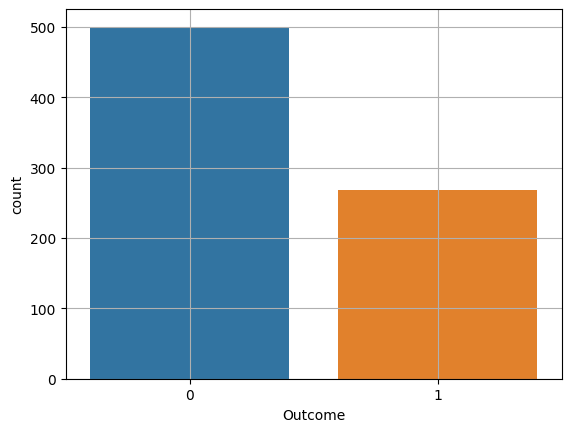

In [ ]:
sns.countplot(diabetes_data, x="Outcome")
plt.grid()
plt.show()

#### Balancing

In [ ]:


df_majority = diabetes_data[diabetes_data['Outcome'] == 0]
df_minority = diabetes_data[diabetes_data['Outcome'] == 1]
df_majority = df_majority.sample(268)
df_balanced = pd.concat([df_minority, df_majority])
df_balanced.shape

# df_balanced = diabetes_data.copy()

(536, 9)

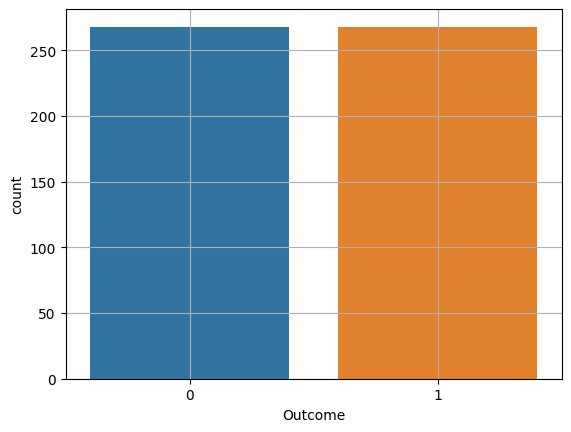

In [ ]:
sns.countplot(df_balanced, x="Outcome")
plt.grid()
plt.show()

### Korrelatsiya

In [ ]:
corr_matrix = df_balanced.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.088335,0.155283,0.087377,0.098192,0.015435,0.029327,0.501691,0.213507
Glucose,0.088335,1.000000,0.114121,0.058176,0.321158,0.202842,0.154579,0.242365,0.474791
BloodPressure,0.155283,0.114121,1.000000,0.194186,0.069700,0.234968,0.029340,0.231559,0.038433
SkinThickness,0.087377,0.058176,0.194186,1.000000,0.440759,0.368056,0.201500,0.131377,0.059785
Insulin,0.098192,0.321158,0.069700,0.440759,1.000000,0.162729,0.198038,0.047380,0.107511
BMI,0.015435,0.202842,0.234968,0.368056,0.162729,1.000000,0.124407,0.019210,0.298168
DiabetesPedigreeFunction,0.029327,0.154579,0.029340,0.201500,0.198038,0.124407,1.000000,0.009814,0.154066
Age,0.501691,0.242365,0.231559,0.131377,0.047380,0.019210,0.009814,1.000000,0.200473
Outcome,0.213507,0.474791,0.038433,0.059785,0.107511,0.298168,0.154066,0.200473,1.000000


In [ ]:
df_balanced.corrwith(df_balanced['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.474791
BMI                         0.298168
Pregnancies                 0.213507
Age                         0.200473
DiabetesPedigreeFunction    0.154066
Insulin                     0.107511
SkinThickness               0.059785
BloodPressure               0.038433
dtype: float64

#### We discard unnecessary columns and divide the data into two parts

In [ ]:
X = df_balanced.drop(["Outcome", "SkinThickness", "BloodPressure", "DiabetesPedigreeFunction", "Insulin"], axis=1)
Y = df_balanced["Outcome"].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=15)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(n_neighbors=3)

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)

knn_gscv.fit(X, Y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.best_score_

0.7574247144340602

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 12}

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([23, 24, 21, 22, 16, 20, 14, 17, 19, 18, 11,  1,  7,  3,  9,  5,  4,
        6,  2, 11,  8, 13, 15,  9], dtype=int32)

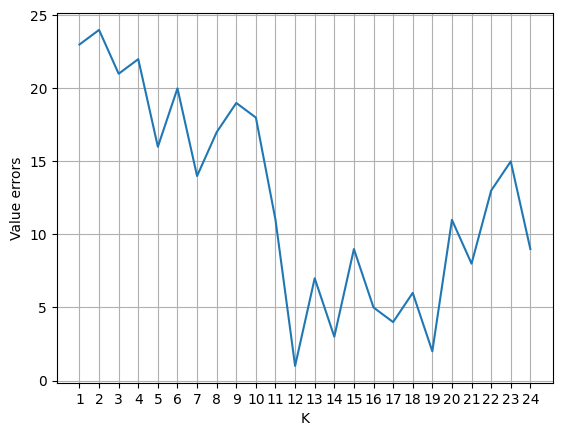

In [ ]:
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid["n_neighbors"])
plt.grid()
plt.xlabel("K")
plt.ylabel("Value errors")
plt.show()

In [ ]:
best_k = knn_gscv.best_params_['n_neighbors']
best_k

12

In [ ]:
knn_model = KNeighborsClassifier(best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
from sklearn.metrics import classification_report

y_predict = knn_model.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.80      0.76      0.78        42

    accuracy                           0.78        81
   macro avg       0.78      0.78      0.78        81
weighted avg       0.78      0.78      0.78        81



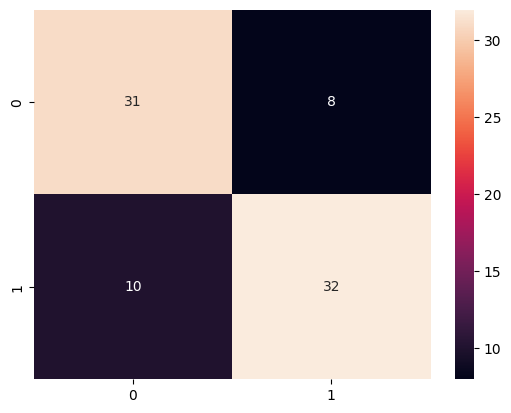

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
confusion_matrix(y_test, y_predict)

array([[31,  8],
       [10, 32]])

# Keras model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
ks_model = Sequential()
ks_model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
ks_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
ks_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
15/15 [==============================] - 2s 7ms/step - loss: 0.8042 - accuracy: 0.5253
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7947 - accuracy: 0.5297
Epoch 3/100
15/15 [==============================] - 0s 14ms/step - loss: 0.7860 - accuracy: 0.5341
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7767 - accuracy: 0.5429
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7683 - accuracy: 0.5516
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.5604
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7519 - accuracy: 0.5692
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7445 - accuracy: 0.5758
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7371 - accuracy: 0.5912
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.6022
Epoch 11

In [ ]:
ks_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.5549 - accuracy: 0.7037


[0.5548564791679382, 0.7037037014961243]